#### Convergence plot, a scatter plot of the parameters associated with each datapoint

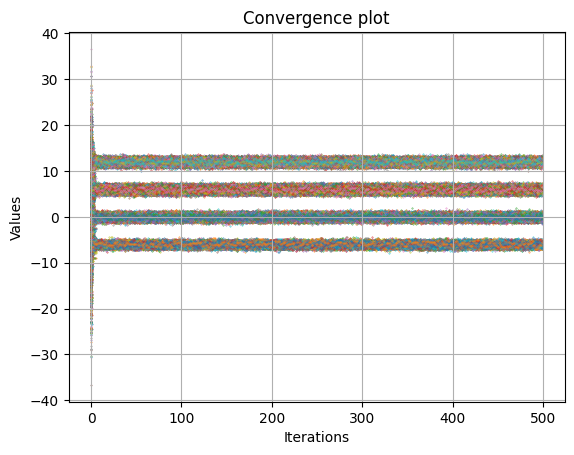

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 


data = pd.read_csv('history.csv',header=None)


for column in data.columns:
    plt.scatter(range(len(data[column])), data[column], s=0.1)  

plt.xlabel('Iterations')
plt.ylabel('Values')
plt.title('Convergence plot')
plt.grid(True)
plt.show()

#### Zoom in on part of the plot to get some details

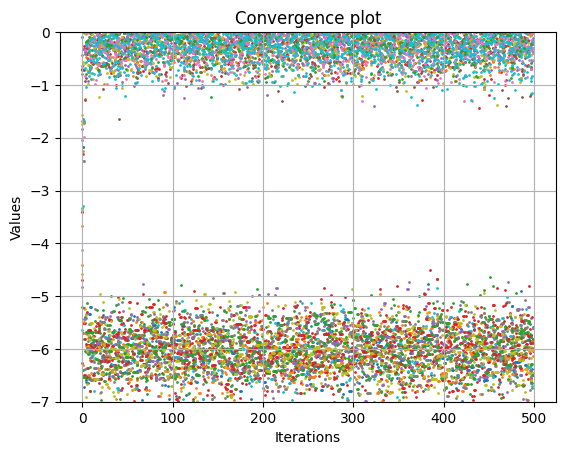

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 


data = pd.read_csv('history.csv',header=None)


if len(data.columns) > 100:
    drop_cols = np.random.choice(data.columns, size=(len(data.columns) - 100), replace=False)
    data = data.drop(columns=drop_cols)


for column in data.columns:
    plt.scatter(range(len(data[column])), data[column], s=1)

plt.xlabel('Iterations')
plt.ylabel('Values')
plt.title('Convergence plot')
plt.grid(True)
# Set the y-axis limits
plt.ylim(-7, 0) # Where to zoom in 
plt.show()

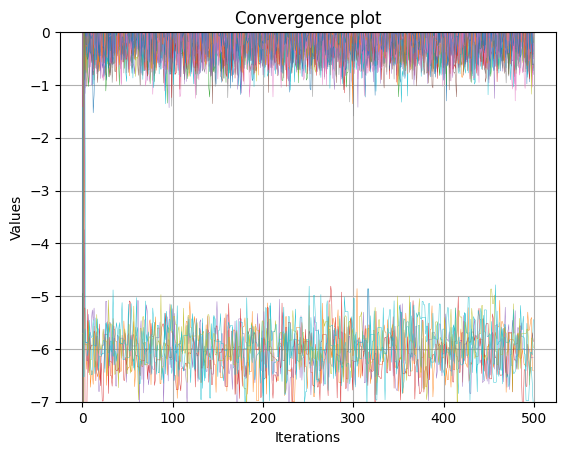

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv('history.csv',header=None)


if len(data.columns) > 100:
    drop_cols = np.random.choice(data.columns, size=(len(data.columns) - 100), replace=False)
    data = data.drop(columns=drop_cols)


for column in data.columns:
    plt.plot(range(len(data[column])), data[column], linewidth=0.3) 

plt.xlabel('Iterations')
plt.ylabel('Values')
plt.title('Convergence plot')
plt.grid(True)
plt.ylim(-7, 0) 
plt.show()

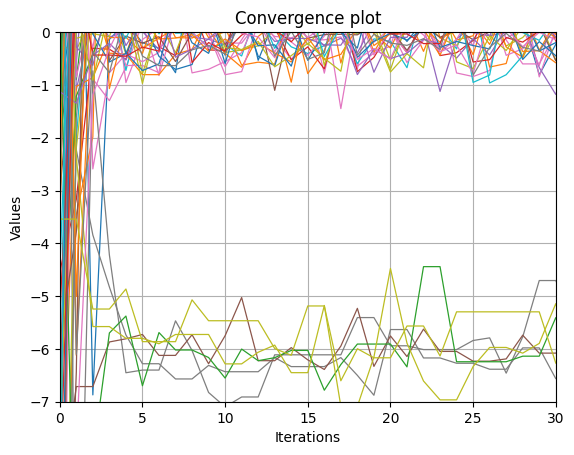

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 


data = pd.read_csv('history.csv',header=None)




if len(data.columns) > 100:
    drop_cols = np.random.choice(data.columns, size=(len(data.columns) - 100), replace=False)
    data = data.drop(columns=drop_cols)


for column in data.columns:
    plt.plot(range(len(data[column])), data[column], linewidth=0.9)

plt.xlabel('Iterations')
plt.ylabel('Values')
plt.title('Convergence plot')
plt.grid(True)
plt.ylim(-7, 0) 
plt.xlim(0,30)
plt.show()

### Advanced plots with arviz
As an example, only 10 parameters will be plotted

array([[<Axes: title={'center': 'var1'}>,
        <Axes: title={'center': 'var1'}>],
       [<Axes: title={'center': 'var10'}>,
        <Axes: title={'center': 'var10'}>],
       [<Axes: title={'center': 'var2'}>,
        <Axes: title={'center': 'var2'}>],
       [<Axes: title={'center': 'var3'}>,
        <Axes: title={'center': 'var3'}>],
       [<Axes: title={'center': 'var4'}>,
        <Axes: title={'center': 'var4'}>],
       [<Axes: title={'center': 'var5'}>,
        <Axes: title={'center': 'var5'}>],
       [<Axes: title={'center': 'var6'}>,
        <Axes: title={'center': 'var6'}>],
       [<Axes: title={'center': 'var7'}>,
        <Axes: title={'center': 'var7'}>],
       [<Axes: title={'center': 'var8'}>,
        <Axes: title={'center': 'var8'}>],
       [<Axes: title={'center': 'var9'}>,
        <Axes: title={'center': 'var9'}>]], dtype=object)

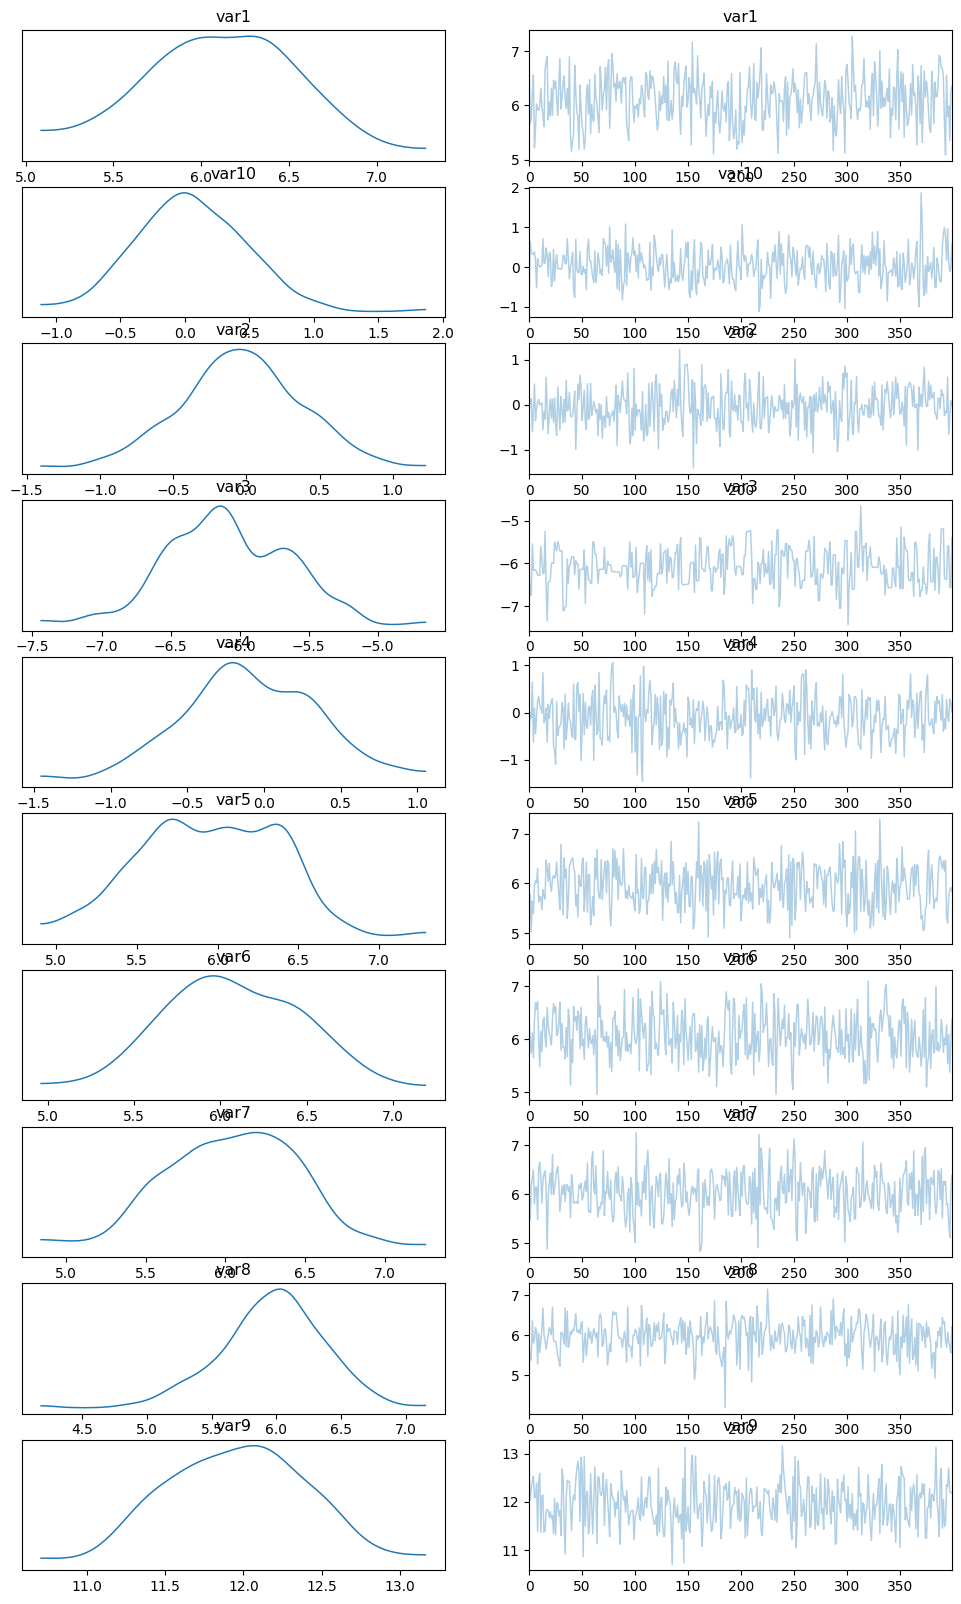

In [148]:
import pandas as pd
import numpy as np
import arviz as az


data = pd.read_csv('history.csv',header=None)
data = data.astype(float)
if len(data.columns) > 10:
    drop_cols = np.random.choice(data.columns, size=(len(data.columns) - 10), replace=False)
    data = data.drop(columns=drop_cols)

burn_in = int(0.2 * len(data))
data_burned_in = data.iloc[burn_in:]

datadict = {
    f'var{i+1}': data_burned_in.iloc[:,i].values
    for i in range(10)
}

dataset = az.convert_to_inference_data(datadict)
az.plot_trace(dataset)

array([[<Axes: title={'center': 'var1'}>,
        <Axes: title={'center': 'var10'}>,
        <Axes: title={'center': 'var2'}>],
       [<Axes: title={'center': 'var3'}>,
        <Axes: title={'center': 'var4'}>,
        <Axes: title={'center': 'var5'}>],
       [<Axes: title={'center': 'var6'}>,
        <Axes: title={'center': 'var7'}>,
        <Axes: title={'center': 'var8'}>],
       [<Axes: title={'center': 'var9'}>, <Axes: >, <Axes: >]],
      dtype=object)

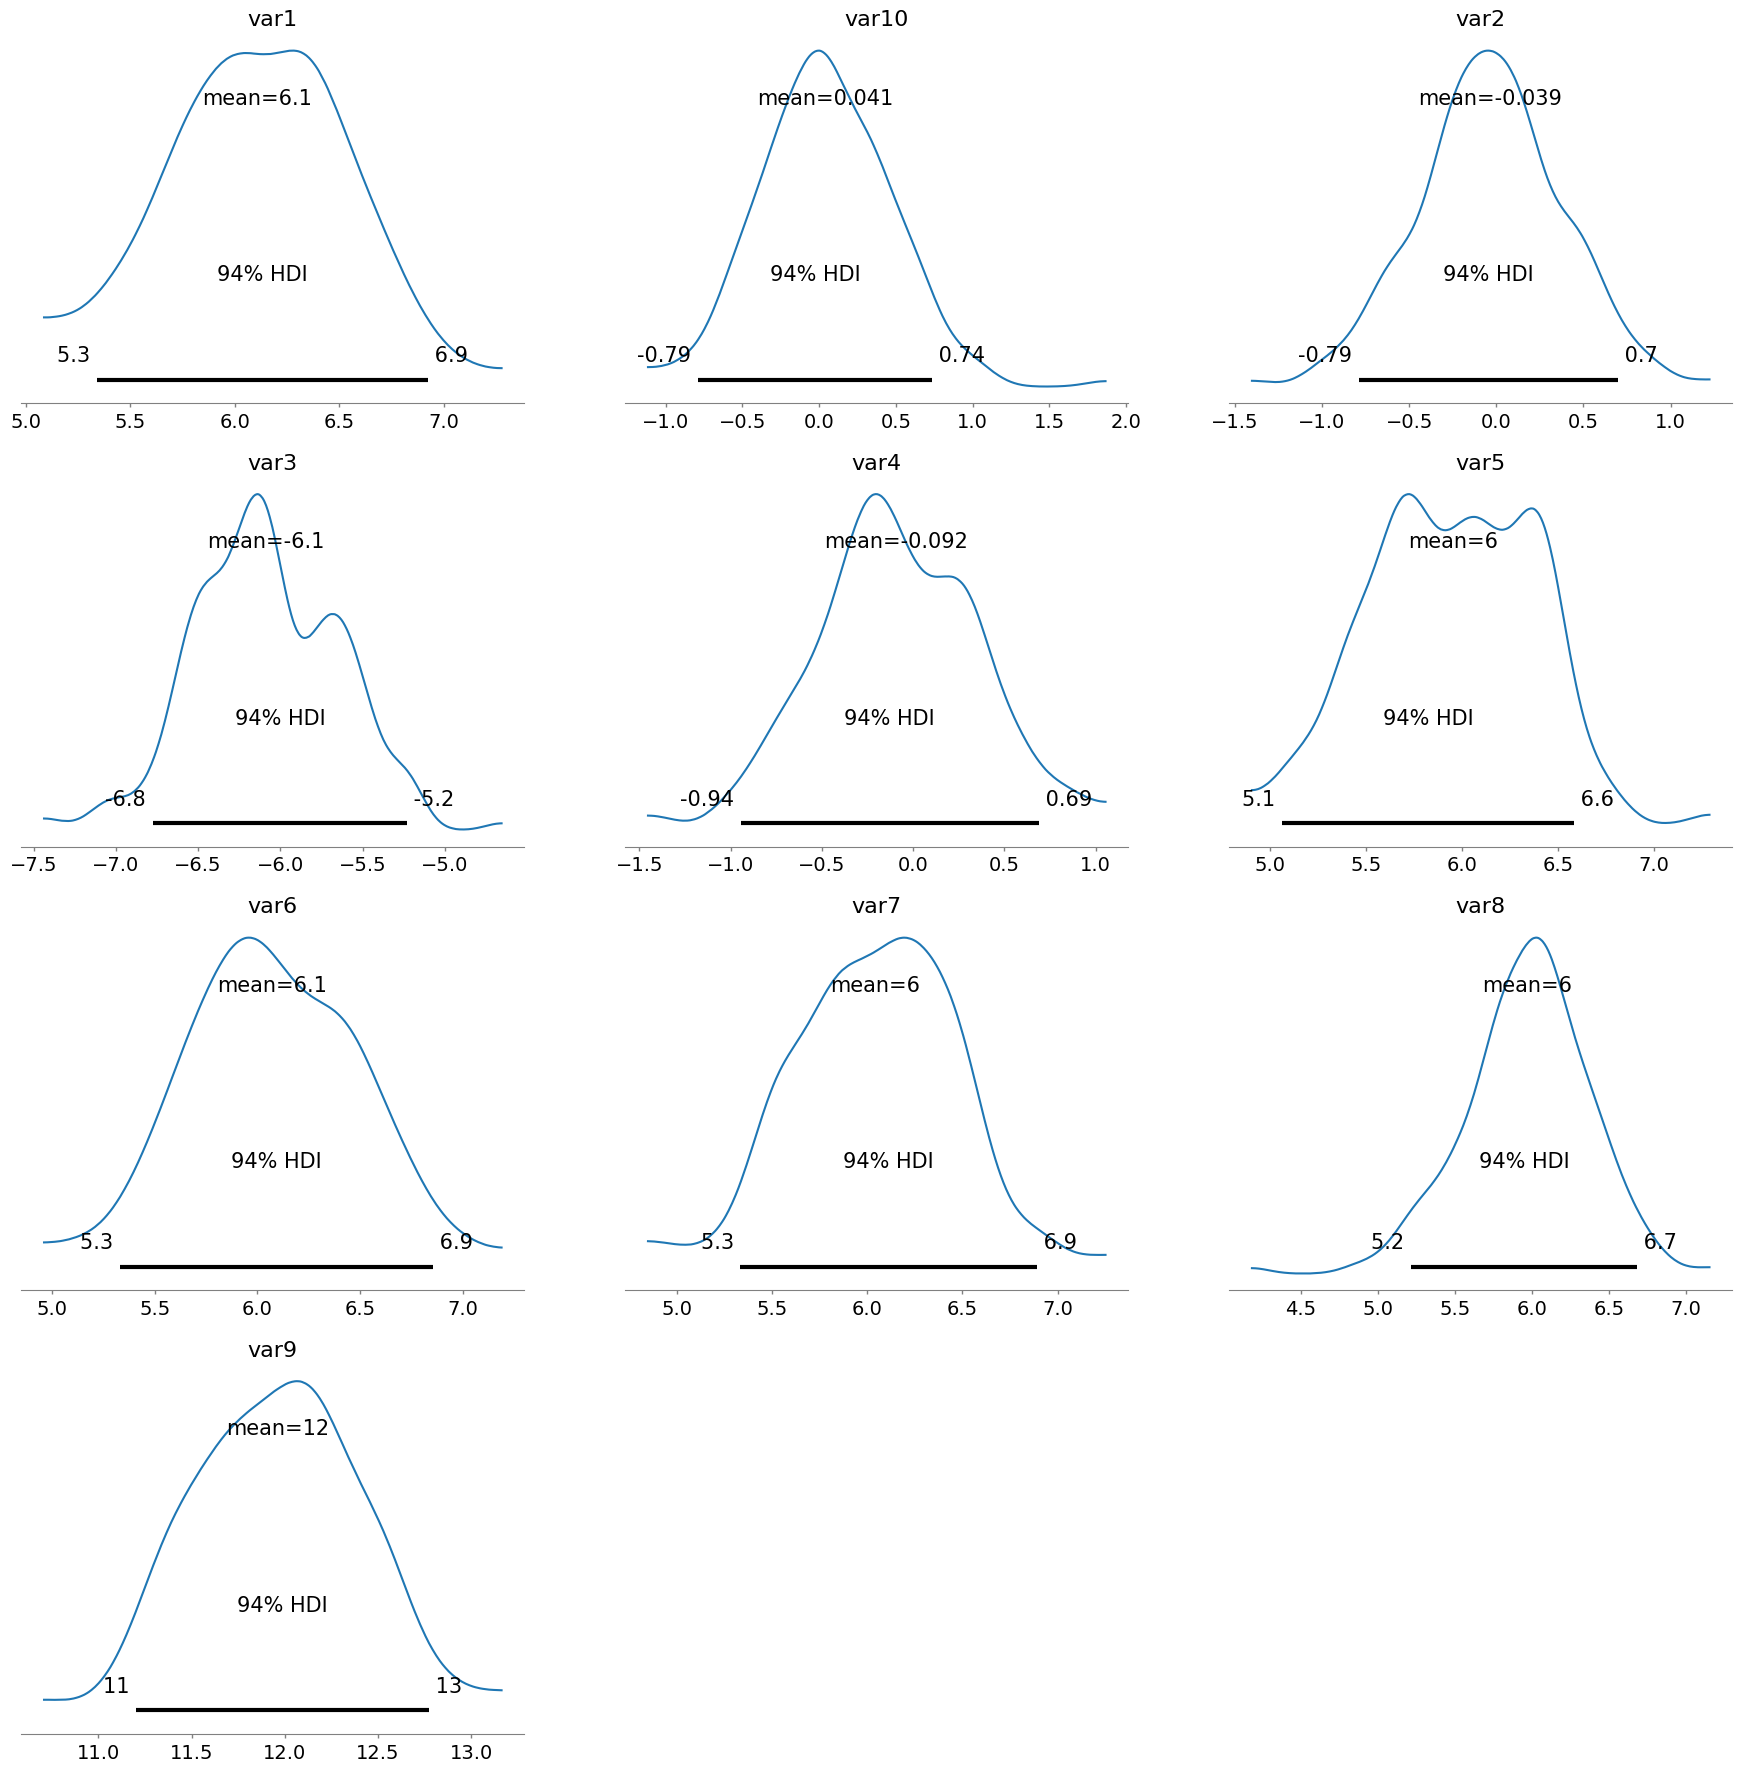

In [149]:
az.plot_posterior(dataset)